Experiment with stellargraph

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from node2vec import Node2Vec
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from collections import Counter
#import stellargraph as sg

ModuleNotFoundError: No module named 'stellargraph'

In [ ]:
df = pd.read_csv("~/project/GitHub/m154/nbs/data/GiveMeSomeCredit/cs-training.csv")
#print(df)
#print(df.dropna())

# Remove the rows with NA's
df = df.dropna()
# Let's work with 500 rows
df = df.iloc[0:500, :]
#Graph = sg.StellarGraph(edges = graph_data)
#Graph = sg.StellarGraph.to_networkx(Graph)

NameError: name 'sg' is not defined

Use `nx.Graph()` for undirected graph and `nx.DiGraph()` for directed graph. `edge_attr=True` uses the other columns as well.

In [ ]:
Graphtype = nx.Graph() 
Graph = nx.from_pandas_edgelist(df,"MonthlyIncome", 'SeriousDlqin2yrs', edge_attr=True, create_using=Graphtype)
#pos = nx.spring_layout(Graph, scale=1)
#nx.draw(Graph, pos, with_labels=True)
#plt.show()

In [ ]:
node2vec_model = Node2Vec(Graph, dimensions=64, walk_length=30, num_walks=200) 
model = node2vec_model.fit(window=10,min_count = 1, batch_words=4)

Computing transition probabilities:   0%|          | 0/336 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|████████████████████████| 200/200 [02:08<00:00,  1.56it/s]


In [ ]:
emb=model.wv[[i for i in model.wv.key_to_index]]
emb.shape
num_nodes = emb.shape[0]

Here I am creating `classes` out of the nodes by looking at `model.wv.index_to_key`. Since `edge_attr=True`, take another look at what values populate `model.wv.index_to_key` and an appropriate banding of classes. Here I thought `model.wv.index_to_key` is populated by `MonthlyIncome` and so I banded it by its quartiles and plotted with PCA and tSNE.

In [ ]:
graph_nodes = [float(i) for i in model.wv.index_to_key]
color_map = []
for node in graph_nodes:
    if node <= 3461:
        color_map.append(0)
    elif node > 3461 and node <= 5250:
        color_map.append(1)
    else: 
        color_map.append(2)   
#nx.draw(Graph, node_color=color_map, with_labels=True)
#plt.show()
def plot_embeddings_PCA(emb, num_nodes, title=""):
    emb_copy = emb.copy()
    if emb_copy.shape[1] > 2:
        pca = PCA(n_components=2)
        emb_copy= pca.fit_transform(emb_copy)
    plt.figure()
    sc = plt.scatter(emb_copy[:,0], emb_copy[:,1], c = graph_nodes, cmap="Dark2")
    plt.legend(handles = sc.legend_elements()[0], title="Clusters", labels=graph_nodes)
    plt.suptitle(title)
    plt.show()
def plot_embeddings_tSNE(emb, num_nodes, title=""):
    emb_copy = emb.copy()
    if emb_copy.shape[1] > 2:
        tsne = TSNE(n_components=2, learning_rate='auto', init='pca')
        emb_copy= tsne.fit_transform(emb_copy)
    plt.figure()
    sc = plt.scatter(emb_copy[:,0], emb_copy[:,1], c = graph_nodes, cmap="Dark2")
    plt.legend(handles = sc.legend_elements()[0], title="Clusters", labels=Counter(graph_nodes).keys())
    plt.suptitle(title)
    plt.show()

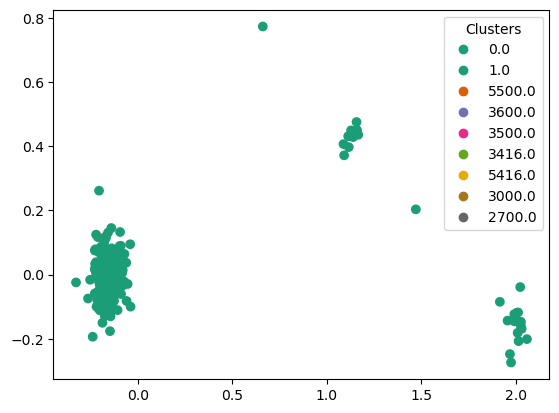

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float32')) -> None

In [ ]:
plot_embeddings_PCA(emb, num_nodes)
#plot_embeddings_tSNE(emb, num_nodes)